In [132]:
import os,sys
from importlib import reload
import numpy as np
import torch
print(os.getpid())
sys.path.append(r'C:\Softwares\Github\MerScope01')

23452


In [133]:
from ChromAn.src import file_io

from ChromAn.src.file_io import dax_process
from ChromAn.src.file_io import data_organization
from ChromAn.src.visual_tools import interactive

In [134]:
reload(dax_process)
reload(data_organization)


<module 'ChromAn.src.file_io.data_organization' from 'C:\\Softwares\\Github\\MerScope01\\ChromAn\\src\\file_io\\data_organization.py'>

In [137]:
data_folder = r'\\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\PE_LT\20230403-4T1_zombie_4x'
data_folder = r'Z:\PE_LT\20230427-4T1_zombie_Zhuanglab_ns_myprobe'

In [138]:
folders, fovs = data_organization.search_fovs_in_folders(data_folder)

- searching in folder: Z:\PE_LT\20230427-4T1_zombie_Zhuanglab_ns_myprobe
-- 10 folders, 154 fovs detected.


In [139]:
%%time
ref_filename = os.path.join(folders[0], fovs[1])
h1_filename = os.path.join(folders[1], fovs[1])

ims, channels = dax_process.load_image_base(os.path.join(folders[0], fovs[1]), verbose=True)

-- all used channels: ['647', '488', '405']
-- single image size: [  50 2048 2048]
- Loaded images for channels:['647', '488', '405'] in 4.356s.
CPU times: total: 1.36 s
Wall time: 4.46 s


<IPython.core.display.Javascript object>


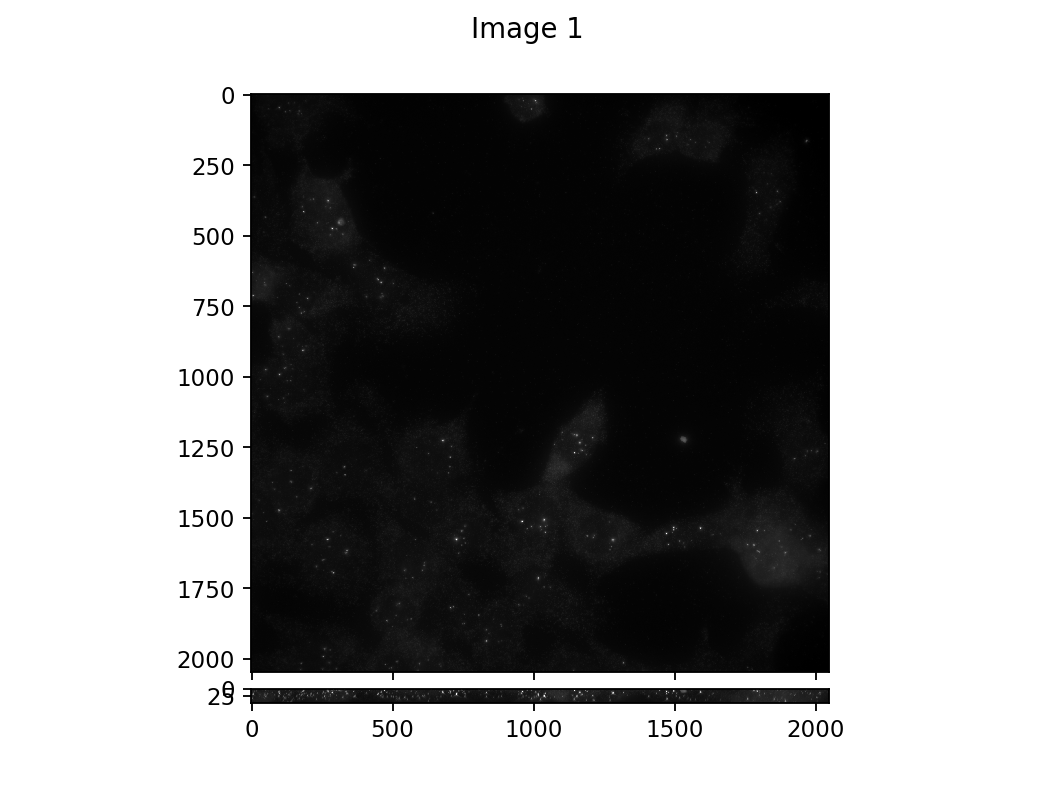

In [145]:
%matplotlib notebook
import matplotlib.pyplot as plt
reload(interactive)
fig = plt.figure(dpi=100)
vis = interactive.imshow_mark_3d(ims, fig=fig)

In [ ]:
from ChromAn.src.correction_tools import alignment
reload(alignment)

ref_filename = os.path.join(folders[0], fovs[1])
h1_filename = os.path.join(folders[1], fovs[1])

In [ ]:
analysis_folder = os.path.join(data_folder, 'Analysis')
color_usage_filename = os.path.join(analysis_folder, 'Color_Usage.csv')

In [ ]:
reload(data_organization)
color_df = data_organization.Color_Usage(color_usage_filename)#.set_index('Hyb')

In [ ]:
color_df

In [ ]:
color_df.get_fiducial_channel(color_df)

In [ ]:
color_df.get_dapi_channel(color_df)

# start here

In [122]:
reload(dax_process)

from ChromAn.src.file_io.dax_process import DaxProcesser
#correction_folder = r'\\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\Corrections\20210621-STORM6_lumencor_from_60_to_50'
correction_folder = r'C:\Data\Analysis\20210621-STORM6_lumencor_from_60_to_50'

In [123]:
ref_filename = os.path.join(folders[0], fovs[1])
h1_filename = os.path.join(folders[-2], fovs[1])

In [124]:
daxp = DaxProcesser(h1_filename, CorrectionFolder=correction_folder, FiducialChannel='488')
daxp._load_image()

Initialize DaxProcesser for file:\\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\PE_LT\20230403-4T1_zombie_4x\H7C8\Conv_zscan_01.dax
- Existing save file: \\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\PE_LT\20230403-4T1_zombie_4x\H7C8\Conv_zscan_01_processed.hdf5
-- all used channels: ['750', '647', '561', '488']
-- single image size: [  50 2048 2048]
- Loaded images for channels:['750', '647', '561', '488'] in 4.587s.


In [75]:
daxp._save_data_to_hdf5('750','im', overwrite=True, compression=None)

- use default save filename.
- use default save key.
- saving to new file: \\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\PE_LT\20230403-4T1_zombie_4x\H7C8\Conv_zscan_01_processed.hdf5
-- saving 750/im.


In [77]:
daxp._save_data_to_hdf5('647','spots', overwrite=True, compression=None)

- use default save filename.
- use default save key.
- saving to new file: \\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\PE_LT\20230403-4T1_zombie_4x\H7C8\Conv_zscan_01_processed.hdf5
-- saving 647/spots.


In [83]:
daxp.correction_log

{'750': {}, '647': {}, '561': {}, '488': {}}

In [126]:
daxp._save_base_to_hdf5(overwrite=True)

- use default save filename.
- saving to existing file: \\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\PE_LT\20230403-4T1_zombie_4x\H7C8\Conv_zscan_01_processed.hdf5
filename
inf_filename
off_filename
power_filename
xml_filename
save_filename
correction_folder
channels
fiducial_channel
-- updated the following basic information: filename,inf_filename,off_filename,power_filename,xml_filename,save_filename,correction_folder,channels,fiducial_channel


In [114]:
daxp._save_param_to_hdf5('correction')

- use default save filename.
- use default save key.
-- saved correction/750 with [] attributes.
-- saved correction/647 with [] attributes.
-- saved correction/561 with [] attributes.
-- saved correction/488 with [] attributes.


In [109]:
with h5py.File(daxp.save_filename, 'r') as _f:
    print('test' in _f.attrs)

False


In [102]:
with h5py.File(daxp.save_filename, 'r') as _f:
    print(_f['correction']['561'].attrs['corr_bleedthrough'])

True


In [9]:
ref_daxp = DaxProcesser(ref_filename, CorrectionFolder=correction_folder)
ref_daxp._load_image()

Initialize DaxProcesser for file:\\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\PE_LT\20230403-4T1_zombie_4x\H0C1\Conv_zscan_01.dax
-- all used channels: ['750', '647', '561', '488', '405']
-- single image size: [  50 2048 2048]
- Loaded images for channels:['750', '647', '561', '488', '405'] in 6.642s.


In [94]:
daxp._corr_bleedthrough(rescale=False)
daxp.correction_log, daxp.im_750.dtype

- Start bleedthrough correction for channels:['750', '647', '561'].
-- loading bleedthrough correction profile from file:bleedthrough_correction_750_647_561_2048_2048.npy
-- corrected bleedthrough for channel 750 in 5.352s.
-- corrected bleedthrough for channel 647 in 5.245s.
-- corrected bleedthrough for channel 561 in 5.362s.
- finish bleedthrough correction in 16.110s. 


({'750': {'corr_bleedthrough': True},
  '647': {'corr_bleedthrough': True},
  '561': {'corr_bleedthrough': True},
  '488': {}},
 dtype('uint16'))

In [11]:
daxp._corr_illumination()
daxp.correction_log, daxp.im_750.dtype

- Correct illumination for channels: ['750', '647', '561', '488']
-- Keep channels: ['750', '647', '561', '488'] for corr_illumination.
- Start illumination correction for channels:['750', '647', '561', '488'].
-- loading illumination correction profile from file:
	 750 illumination_correction_750_2048x2048.npy
	 647 illumination_correction_647_2048x2048.npy
	 561 illumination_correction_561_2048x2048.npy
	 488 illumination_correction_488_2048x2048.npy
-- corrected illumination for channel 750 in 4.290s.
-- corrected illumination for channel 647 in 4.402s.
-- corrected illumination for channel 561 in 4.486s.
-- corrected illumination for channel 488 in 4.738s.
- Finished illumination correction in 18.011s.


({'750': {'corr_bleedthrough': True, 'corr_illumination': True},
  '647': {'corr_bleedthrough': True, 'corr_illumination': True},
  '561': {'corr_bleedthrough': True, 'corr_illumination': True},
  '488': {'corr_illumination': True}},
 dtype('uint16'))

In [12]:
daxp._corr_hot_pixels()
daxp.correction_log, daxp.im_750.dtype

- Correct hot_pixel for channels: ['750', '647', '561', '488']
-- Keep channels: ['750', '647', '561', '488'] for corr_hot_pixel.
- Start hot_pixel correction for channels:['750', '647', '561', '488'].
-- corrected hot_pixel for channel 750 in 3.313s.
-- corrected hot_pixel for channel 647 in 3.327s.
-- corrected hot_pixel for channel 561 in 3.469s.
-- corrected hot_pixel for channel 488 in 3.360s.
- Finished hot_pixel correction in 13.469s.


({'750': {'corr_bleedthrough': True,
   'corr_illumination': True,
   'corr_hot_pixel': True},
  '647': {'corr_bleedthrough': True,
   'corr_illumination': True,
   'corr_hot_pixel': True},
  '561': {'corr_bleedthrough': True,
   'corr_illumination': True,
   'corr_hot_pixel': True},
  '488': {'corr_illumination': True, 'corr_hot_pixel': True}},
 dtype('uint16'))

In [13]:
daxp._calculate_drift(RefImage=ref_daxp.im_488, overwrite=False)

+ Calculate drift with fiducial_channel: 488
-- start aligning given source image to given reference image.
-- drift 0: [ -0.32 -51.5  -11.2 ] in 2.388s.
-- drift 1: [ -0.11 -51.43 -11.16] in 2.329s.
-- drift 2: [ -0.14 -51.4  -11.07] in 2.372s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.


(array([ -0.19      , -51.44333333, -11.14333333]), 1)

In [15]:
daxp._corr_warpping_drift_chromatic(#ref_channel='647', 
                 correction_folder=r'C:\Data\Analysis\20210621-STORM6_lumencor_from_60_to_50',
                 warp_kwargs={'warp_order':1, 'border_mode':'grid-constant'},)

- Start warpping images drift:['750', '647', '561', '488'], chromatic:['750', '647', '561']
- Start 3D warpping for channels:['750', '647', '561', '488'].
-- loading chromatic correction profile from file:
	 750 chromatic_correction_750_647_50_2048_2048.npy
	 647 None
	 561 chromatic_correction_561_647_50_2048_2048.npy
-- corrected warp for channel 750 in 27.098s.
-- corrected warp for channel 647 in 25.727s.
-- corrected warp for channel 561 in 25.575s.
-- corrected warp for channel 488 in 25.589s.
- Finished warp correction in 110.406s.


In [23]:
from ChromAn.src.spot_tools import spot_fitting
reload(spot_fitting)

<module 'ChromAn.src.spot_tools.spot_fitting' from 'C:\\Softwares\\Github\\MerScope01\\ChromAn\\src\\spot_tools\\spot_fitting.py'>

In [76]:
daxp._fit_3D_spots(fit_channels=['647'],
                   seeding_kwargs={'th_seed':2000}, overwrite=True)

-- fit spots in channel: 647, 220 fitted in 41.251s.


([Spots3D([[ 3.55544570e+04,  3.02563591e+01,  1.73305640e+03, ...,
             1.59571305e-01,  1.20369084e-01,  1.41103247e+03],
           [ 3.69419453e+04,  9.57848644e+00,  9.04450073e+02, ...,
             6.39950514e-01,  4.43902910e-01,  8.92890381e+02],
           [ 3.13508496e+04,  2.08430252e+01,  7.28438721e+02, ...,
            -1.82654381e-01, -2.12649450e-01,  1.22779126e+03],
           ...,
           [ 2.50488940e+03,  3.92923393e+01,  1.62362903e+03, ...,
            -1.22752541e-03,  3.65388185e-01,  1.34767242e+02],
           [ 2.03277832e+03,  2.07944775e+01,  6.94739380e+02, ...,
            -4.24075603e-01,  3.91889632e-01,  1.82101791e+02],
           [ 2.18198608e+03,  1.29781713e+01,  9.37064148e+02, ...,
             6.01220191e-01,  1.00000000e+00,  1.54590729e+02]],
          dtype=float32)],
 ['647'])

In [24]:
daxp._fit_3D_spots(seeding_kwargs={'th_seed':2000})

-- fit spots in channel: 750
- start SpotFitter seeding
-- start seeding image, th=2000.00->2000.00, found 32 seeds in 35.75s
-- start fitting spots with 32 seeds, 32 fitted in 1.105s.
--- 32 fitted in 37.196s.
-- fit spots in channel: 647
- start SpotFitter seeding
-- start seeding image, th=2000.00->2000.00, found 220 seeds in 34.86s
-- start fitting spots with 220 seeds, 220 fitted in 4.006s.
--- 220 fitted in 39.331s.
-- fit spots in channel: 561
- start SpotFitter seeding
-- start seeding image, th=2000.00->2000.00, found 4 seeds in 36.18s
-- start fitting spots with 4 seeds, 4 fitted in 0.798s.
--- 4 fitted in 37.254s.


([Spots3D([[ 5.26107031e+03,  9.61604023e+00,  9.04780701e+02,
             1.77216882e+03,  5.34269189e+03,  1.55137324e+00,
             1.54120767e+00,  1.45450342e+00,  1.00000000e+00,
             4.24583703e-01,  1.89709503e+02],
           [ 4.44355664e+03,  2.23967705e+01,  1.37049219e+03,
             7.48647522e+02,  6.84545557e+03,  2.04684734e+00,
             1.61042809e+00,  1.67515397e+00,  5.68343639e-01,
            -2.42695436e-01,  2.58328308e+02],
           [ 4.27183057e+03,  3.99203453e+01,  1.62264453e+03,
             1.25960620e+03,  4.80590674e+03,  2.59645057e+00,
             1.57333040e+00,  1.70291960e+00, -6.18132576e-03,
             2.12263837e-01,  1.47372787e+02],
           [ 3.78952686e+03,  2.14053440e+01,  1.54863196e+03,
             1.16308936e+03,  4.80658398e+03,  1.76582134e+00,
             1.49506760e+00,  1.66658890e+00, -1.19637430e-01,
             1.00000000e+00,  2.21626068e+02],
           [ 3.76033203e+03,  2.20506458e+01,  1.0749292

In [49]:
from ChromAn.src.correction_tools import filter
reload(filter)

<module 'ChromAn.src.correction_tools.filter' from 'C:\\Softwares\\Github\\MerScope01\\ChromAn\\src\\correction_tools\\filter.py'>

In [104]:
dir(daxp)

['_FindDaxChannels',
 '_FindGlobalPosition',
 '_FindImageSize',
 '_LoadInfFile',
 '_LoadSegmentation',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_calculate_drift',
 '_check_existance',
 '_corr_bleedthrough',
 '_corr_chromatic_functions',
 '_corr_gaussian_highpass',
 '_corr_hot_pixels',
 '_corr_illumination',
 '_corr_warpping_drift_chromatic',
 '_fit_3D_spots',
 '_load_from_hdf5',
 '_load_image',
 '_save_data_to_hdf5',
 '_save_param_to_hdf5',
 '_save_to_file',
 '_save_to_npy',
 'channels',
 'correction_folder',
 'correction_log',
 'correction_praram',
 'fiducial_channel',
 'filename',
 'im_488',
 'im_561',
 'im_647',
 'im_750',
 'image_size',
 'inf_filename',
 'l

In [18]:
daxp._gaussian_highpass()

- Apply Gaussian highpass for channels: ['750', '647', '561', '488']
-- Keep channels: ['750', '647', '561', '488'] for gaussian_highpass.
- Start gaussian_highpass correction for channels:['750', '647', '561', '488'].
-- corrected gaussian_highpass for channel 750 in 11.194s.
-- corrected gaussian_highpass for channel 647 in 9.939s.
-- corrected gaussian_highpass for channel 561 in 10.022s.
-- corrected gaussian_highpass for channel 488 in 10.109s.
- Finished gaussian_highpass correction in 41.264s.


In [23]:
daxp.correction_log, daxp.im_750.dtype


({'750': {'corr_bleedthrough': True,
   'corr_illumination': True,
   'corr_hot_pixel': True,
   'corr_drift': True,
   'corr_chromatic': True,
   'corr_gaussian_highpass': True},
  '647': {'corr_bleedthrough': True,
   'corr_illumination': True,
   'corr_hot_pixel': True,
   'corr_drift': True,
   'corr_chromatic': True,
   'corr_gaussian_highpass': True},
  '561': {'corr_bleedthrough': True,
   'corr_illumination': True,
   'corr_hot_pixel': True,
   'corr_drift': True,
   'corr_chromatic': True,
   'corr_gaussian_highpass': True},
  '488': {'corr_illumination': True,
   'corr_hot_pixel': True,
   'corr_drift': True,
   'corr_gaussian_highpass': True}},
 dtype('uint16'))

In [24]:
daxp.correction_praram

{'corr_bleedthrough': {'rescale': True},
 'corr_illumination': {'rescale': True},
 'corr_hot_pixel': {'hot_pixel_th': 0.5,
  'hot_pixel_num_th': 4,
  'interpolation_style': 'nearest',
  'rescale': True},
 'warp': {'warp_order': 1, 'border_mode': 'grid-constant', 'rescale': True},
 'corr_gaussian_highpass': {'sigma': 3, 'truncate': 2, 'rescale': True}}

<IPython.core.display.Javascript object>


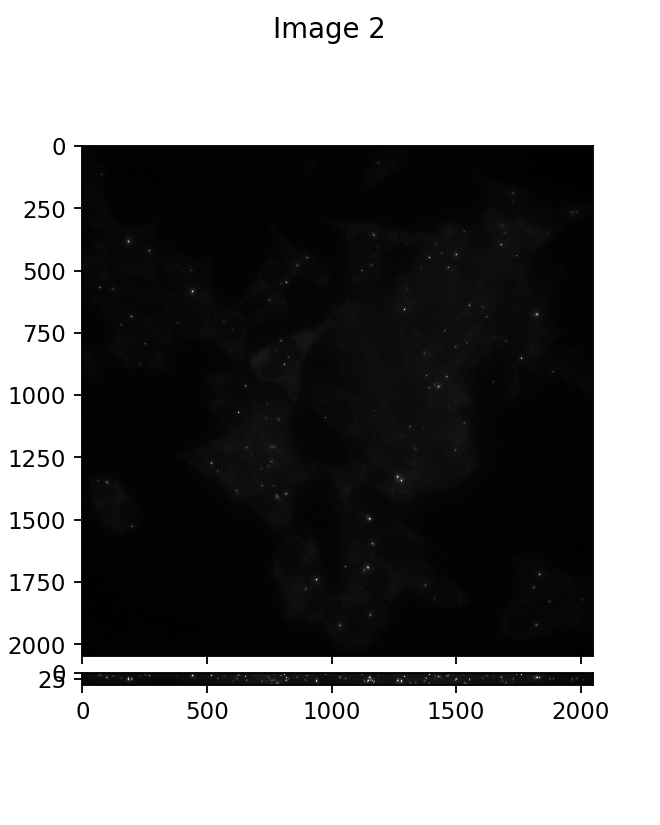

In [22]:
%matplotlib notebook
interactive.imshow_mark_3d([daxp.im_750, ref_daxp.im_750])

<IPython.core.display.Javascript object>


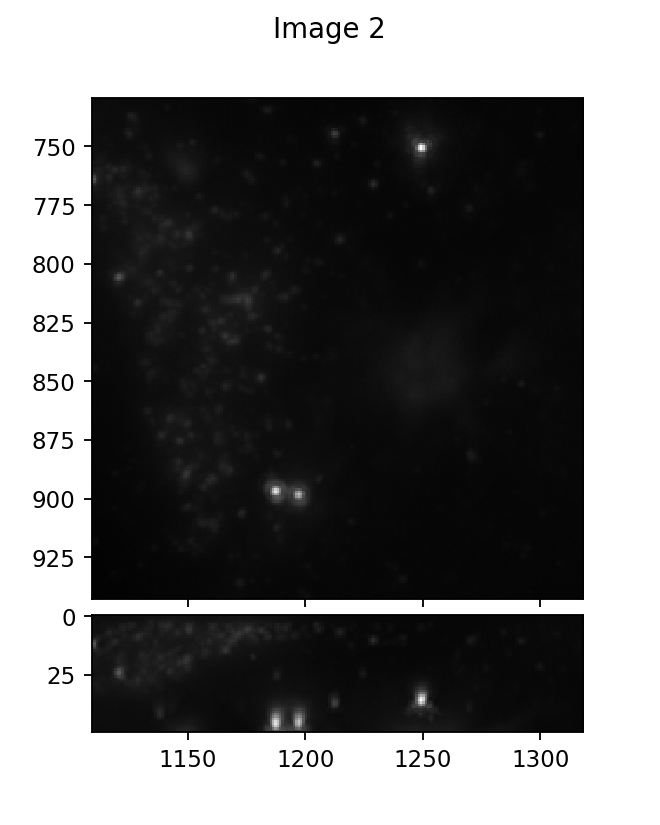

In [103]:
%matplotlib notebook
interactive.imshow_mark_3d([daxp.im_647, ref_daxp.im_647])

<IPython.core.display.Javascript object>


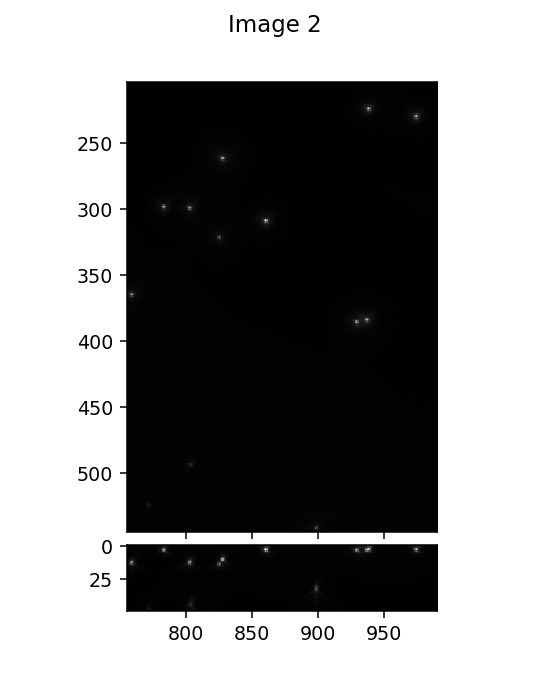

In [44]:
%matplotlib notebook
interactive.imshow_mark_3d([daxp.im_488, ref_daxp.im_488])

In [284]:
daxp._calculate_drift(RefImage=ref_daxp.im_488, overwrite=True)

+ Calculate drift with fiducial_channel: 488
-- start aligning given source image to given reference image.
-- drift 0: [ -0.32 -51.5  -11.2 ] in 2.340s.
-- drift 1: [ -0.11 -51.43 -11.16] in 2.416s.
-- drift 2: [ -0.13 -51.4  -11.07] in 2.409s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.


(array([ -0.18666667, -51.44333333, -11.14333333]), 0)

In [87]:
from ChromAn.src.correction_tools import load_corrections
reload(load_corrections)
from ChromAn.src.correction_tools.bleedthrough import bleedthrough_correction
from ChromAn.src.correction_tools.load_corrections import load_correction_profile

In [88]:
bleed_pf = load_correction_profile('bleedthrough', correction_folder=correction_folder)

In [89]:
corr_channels = ['750','647','561']
raw_ims = [getattr(daxp, f"im_{_ch}") for _ch in corr_channels]

In [28]:
_cims, _cchs = daxp._corr_bleedthrough(
    correction_channels=corr_channels,
    correction_pf=bleed_pf, 
    save_attrs=False)

- Start bleedthrough correction for channels:['750', '647', '561'].
-- corrected bleedthrough for channel 750 in 7.026s.
-- corrected bleedthrough for channel 647 in 6.963s.
-- corrected bleedthrough for channel 561 in 6.995s.
- finish bleedthrough correction in 20.986s. 


In [275]:
from ChromAn.src.correction_tools import illumination
reload(illumination)

<module 'ChromAn.src.correction_tools.illumination' from 'C:\\Softwares\\Github\\MerScope01\\ChromAn\\src\\correction_tools\\illumination.py'>

<IPython.core.display.Javascript object>


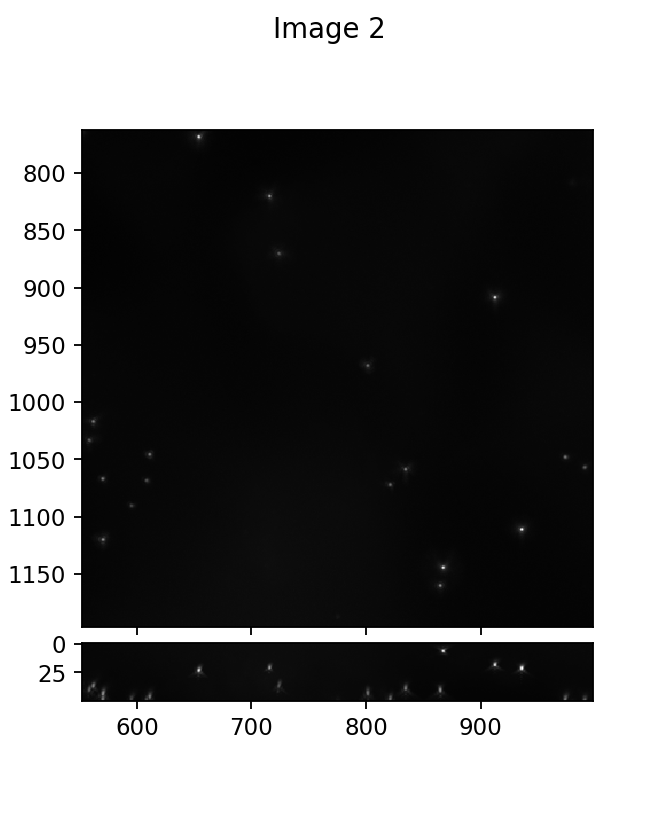

In [21]:
interactive.imshow_mark_3d([daxp.im_488, ref_daxp.im_488])

In [33]:
dir(daxp)

['_FindDaxChannels',
 '_FindGlobalPosition',
 '_FindImageSize',
 '_LoadInfFile',
 '_LoadSegmentation',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_calculate_drift',
 '_check_existance',
 '_corr_bleedthrough',
 '_corr_chromatic_functions',
 '_corr_gaussian_highpass',
 '_corr_hot_pixels',
 '_corr_illumination',
 '_corr_warpping_drift_chromatic',
 '_fit_3D_spots',
 '_fit_spots',
 '_fit_spots_by_segmentation',
 '_load_from_hdf5',
 '_load_image',
 '_save_to_hdf5',
 '_save_to_npy',
 'channels',
 'correction_folder',
 'correction_log',
 'correction_praram',
 'fiducial_channel',
 'filename',
 'im_488',
 'im_561',
 'im_647',
 'im_750',
 'image_size',
 'inf_filename',
 'lo

In [34]:
save_filename = r'E:\Pu\Analysis\20230405-4T1_zombie_8x_batch2\Conv_zscan_00.hdf5'

In [42]:
import h5py
_key = f'combo/ims'
with h5py.File(save_filename, 'r') as _f:
    print(_f['combo'].keys())
    _data = _f[_key][0]
    print(_key in _f)

<KeysViewHDF5 ['channels', 'drifts', 'flags', 'ids', 'ims', 'raw_spots', 'spots']>
True


In [ ]:
daxp.s

<IPython.core.display.Javascript object>


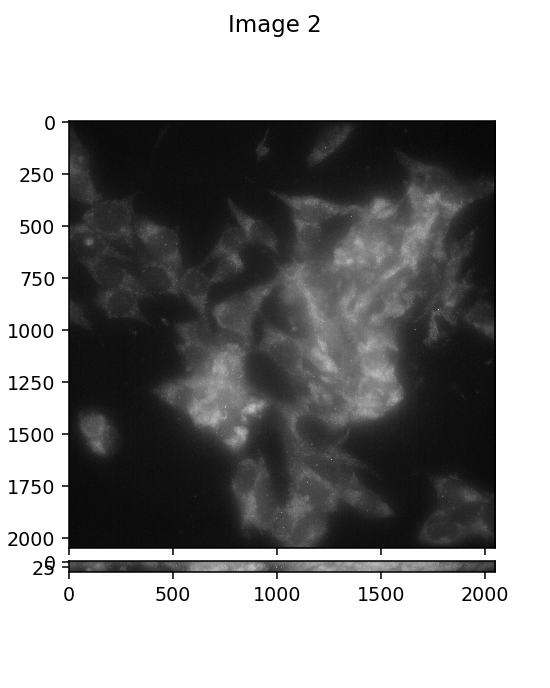

In [272]:
interactive.imshow_mark_3d([illu_corr_ims2[0], raw_ims[0]])

In [276]:
illu_corr_ims2 = illumination.illumination_correction(raw_ims, corr_channels,
                                                      correction_pf=illumination_pf)

- Start illumination correction for channels:['750', '647', '561'].
-- corrected illumination for channel 750 in 4.458s.
-- corrected illumination for channel 647 in 4.928s.
-- corrected illumination for channel 561 in 4.919s.
- Finished illumination correction in 14.306s.


In [252]:
illumination_pf = load_correction_profile('illumination', corr_channels=daxp.channels,
                                          correction_folder=correction_folder, )

In [253]:
illu_corr_ims = daxp._corr_illumination(correction_pf=illumination_pf, save_attrs=False)

- Correct illumination for channels: ['750', '647', '561', '488']
-- Keep channels: ['750', '647', '561', '488'] for corr_illumination.
-- corrected illumination for channel 750 in 4.836s.
-- corrected illumination for channel 647 in 5.151s.
-- corrected illumination for channel 561 in 5.212s.
-- corrected illumination for channel 488 in 5.501s.
- Finished illumination correction in 20.700s.


<IPython.core.display.Javascript object>


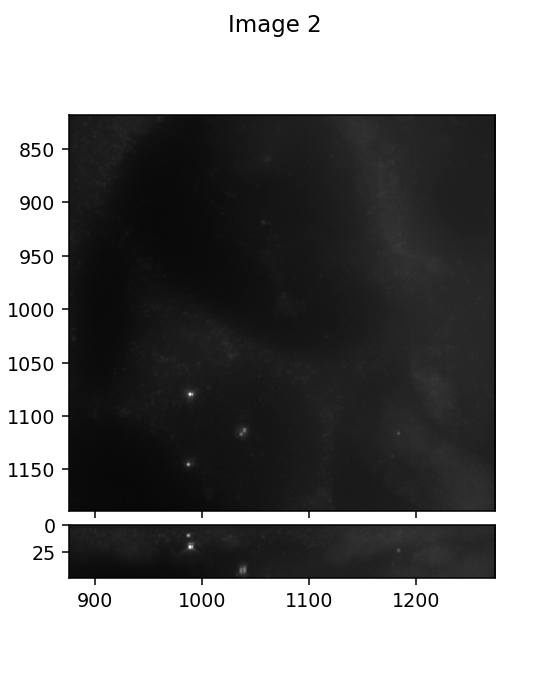

In [262]:
interactive.imshow_mark_3d([illu_corr_ims[0][1], daxp.im_647], min_max_default=[2000,10000])

<IPython.core.display.Javascript object>


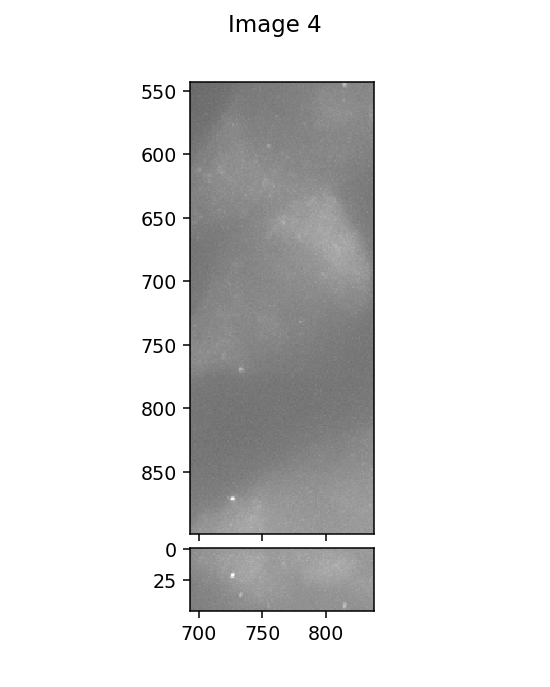

In [35]:
interactive.imshow_mark_3d([daxp.im_750, daxp.im_647, daxp.im_561, _cims[2]])

<IPython.core.display.Javascript object>


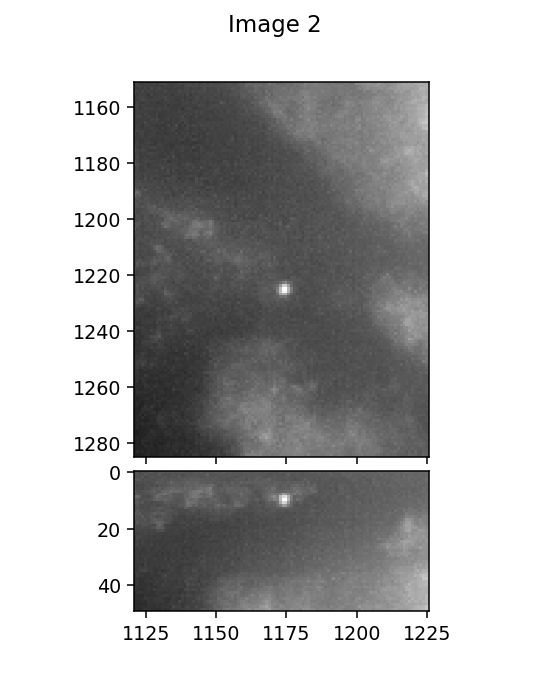

In [32]:
interactive.imshow_mark_3d([daxp.im_750, _cims[0], daxp.im_561, _cims[2]])

## Fitting

In [207]:
from ChromAn.src.spot_tools import spot_fitting,spot_class, bintu_fitting

In [221]:
from ChromAn.src.spot_tools import spot_fitting
reload(spot_fitting)
from ChromAn.src.spot_tools import spot_fitting,spot_class
from ChromAn.src.spot_tools.spot_class import Spots3D
reload(spot_class)
reload(bintu_fitting)

<module 'ChromAn.src.spot_tools.bintu_fitting' from 'C:\\Softwares\\Github\\MerScope01\\ChromAn\\src\\spot_tools\\bintu_fitting.py'>

In [243]:
fitter = spot_fitting.SpotFitter(daxp.im_647[:,:500,:500])
fitter.seeding(seeding_kwargs={'th_seed':2000})
fitter.CPU_fitting()

- start SpotFitter seeding
-- start seeding image, th=2000.00->2000.00, found 6 seeds in 1.55s


-- start fitting spots with 6 seeds, 6 fitted in 0.120s.


In [245]:
reload(interactive)

<module 'ChromAn.src.visual_tools.interactive' from 'C:\\Softwares\\Github\\MerScope01\\ChromAn\\src\\visual_tools\\interactive.py'>

<IPython.core.display.Javascript object>


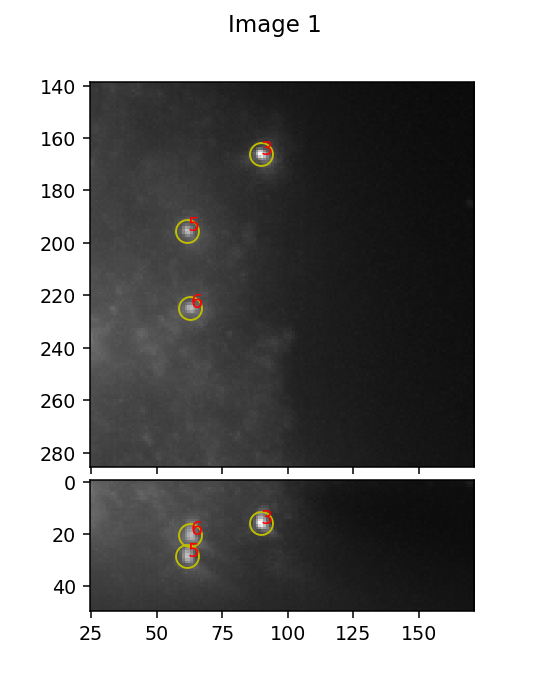

In [246]:
interactive.imshow_mark_3d([fitter.image],
                           use_dict={'coords':fitter.spots.to_coords(),
                                      'class_ids':np.zeros(len(fitter.spots)),})

array([[197.43034  , 436.0172   ,  29.309408 ],
       [ 91.27357  , 167.91946  ,  16.005302 ],
       [281.19775  , 474.3609   ,  14.236407 ],
       [177.52196  , 393.39948  ,  10.5      ],
       [175.65703  , 393.93323  ,  13.591315 ],
       [113.08677  , 444.03055  ,   7.4922075],
       [110.328125 , 448.5631   ,   7.1987605]], dtype=float32)

In [73]:
remove_edge_points(np.array(fitter.image.shape), seed_coords, distance=2)

Spots3D([[3950.,   10.,  905., 1772.],
         [3508.,   23., 1370.,  749.],
         [3469.,   40., 1623., 1260.],
         ...,
         [1002.,   20., 1289., 1580.],
         [1001.,   11.,  518.,  855.],
         [1000.,    7.,  725., 1560.]])

In [111]:
im3d = daxp.im_488.astype(np.float32)

In [114]:
from scipy.ndimage import median_filter

In [117]:
med_im3d = median_filter(im3d, 3)

<IPython.core.display.Javascript object>


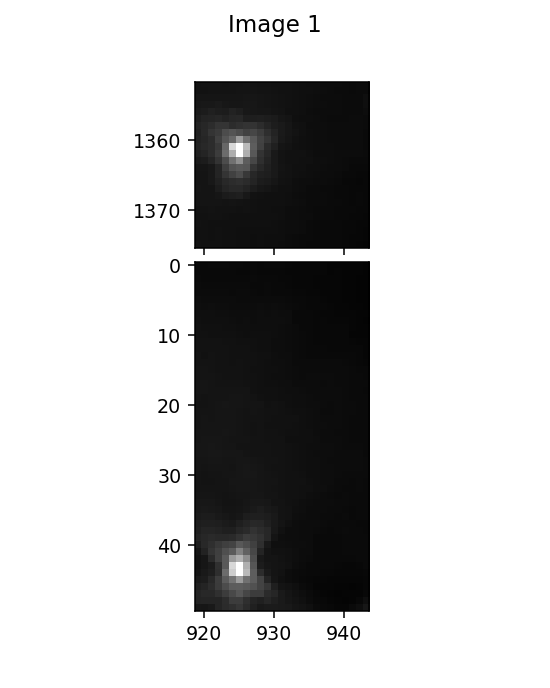

In [118]:
interactive.imshow_mark_3d([med_im3d, im3d])

In [113]:
input_= torch.tensor(im3d).cuda()

In [190]:
Spots3D(fitter.seeds)

Spots3D([[3950.,   10.,  905., 1772.],
         [3508.,   23., 1370.,  749.],
         [3469.,   40., 1623., 1260.],
         ...,
         [1002.,   20., 1289., 1580.],
         [1001.,   11.,  518.,  855.],
         [1000.,    7.,  725., 1560.]])

In [198]:
fitter.seeds[0].to_coords()

array([  10.,  905., 1772.])

In [127]:
test_filename = r'\\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\20210717-P_brain_MO4_MERFISH\H2M2_BIT3-4\Conv_zscan_001.dax'

In [128]:
test_daxp = DaxProcesser(test_filename, CorrectionFolder=correction_folder, FiducialChannel='488')

Initialize DaxProcesser for file:\\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\20210717-P_brain_MO4_MERFISH\H2M2_BIT3-4\Conv_zscan_001.dax
- New save file: \\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\20210717-P_brain_MO4_MERFISH\H2M2_BIT3-4\Conv_zscan_001_processed.hdf5
-- all used channels: ['750', '647', '561']


In [129]:
test_daxp._load_image()

-- single image size: [  13 2048 2048]
- Loaded images for channels:['750', '647', '561'] in 1.845s.


<IPython.core.display.Javascript object>


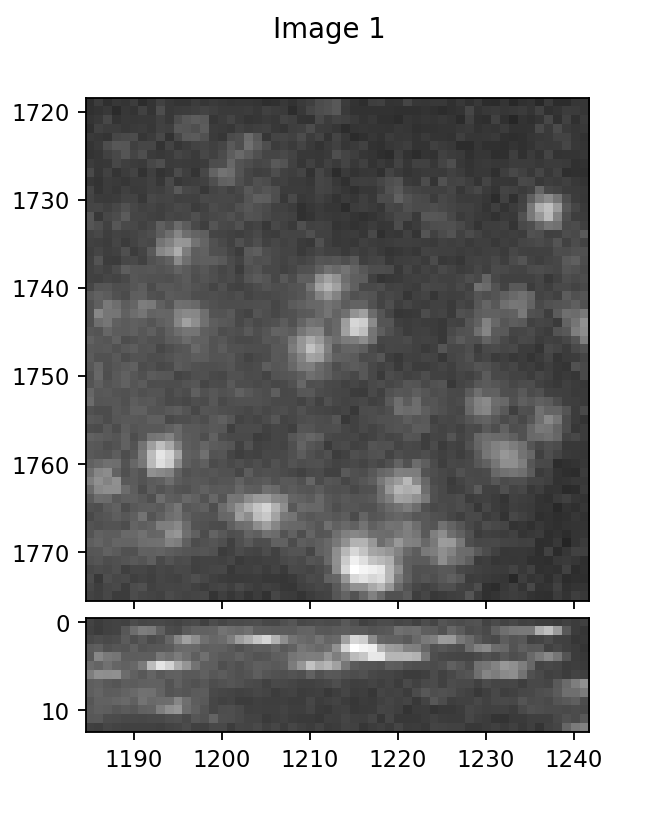

In [130]:
interactive.imshow_mark_3d([test_daxp.im_750])